In [20]:
import pandas as pd
from sklearn.cross_decomposition import PLSRegression
from sklearn.cluster import KMeans
from msresist.comp_estimator import ComHyperPar, MyOwnKMEANS
from msresist.plsr import FilteringOutPeptides, ClusterAverages, GridSearch_CV, MeasuredVsPredicted_LOOCVplot, Q2Y_across_components, R2Y_across_components
import scipy as sp, numpy as np, pandas as pd, math
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
from FileExporter import create_download_link
import warnings
warnings.simplefilter("ignore")

In [2]:
# Varaibles: X phoshopeptides
# X = pd.read_csv('./msresist/data/ms-initial.csv', header=0)
X = pd.read_csv('./msresist/data/20180817_JG_AM_TMT10plex_R1_psms.csv', header=0)
header = pd.read_csv('./msresist/data/20180817_JG_AM_TMT10plex_R1_psms.csv', header=None).iloc[0,:]
treatments = pd.read_csv('./msresist/data/20180817_JG_AM_TMT10plex_R1_psms.csv', header=None).iloc[0,2:]

X_protnames, X_seqs = [], []
x = list(map(lambda  v : X_protnames.append(v.split("OS")[0]), X.iloc[:,1]))

X_data = X.iloc[:,2:]

Xf = FilteringOutPeptides(X, header)
Xf_data = np.transpose(Xf.iloc[:, 2:])
Xf_seqs = Xf.iloc[:,0]
Xf_protnames = Xf.iloc[:,1]

# Observations: Y
Y = pd.read_csv('./msresist/data/ydata.csv', header=0)
Y_cv = Y.iloc[:10, 2]

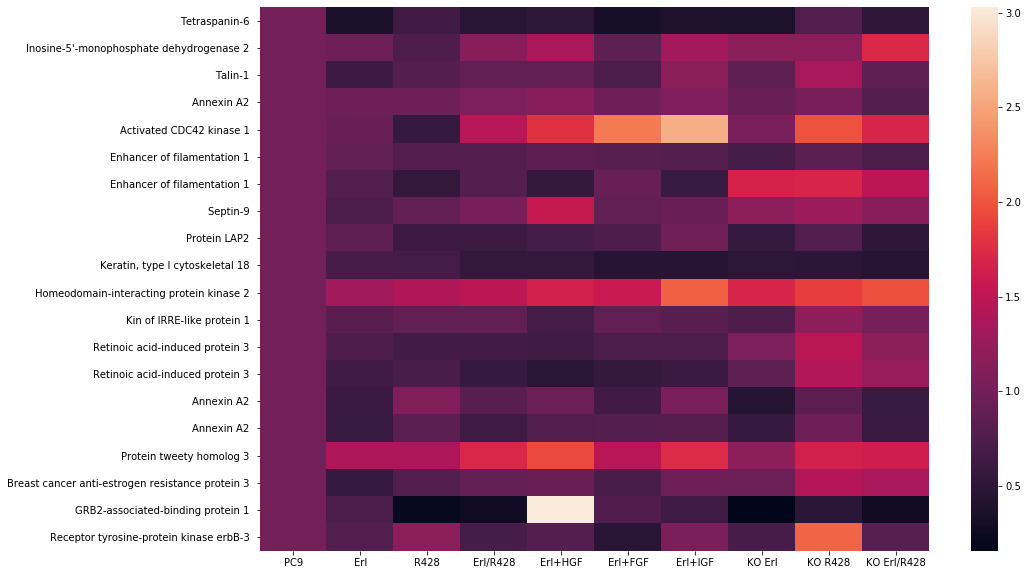

In [3]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 10))
labels = X_protnames[10:30]
sns.heatmap(ax = ax, data = np.transpose(np.transpose(X_data).iloc[:,10:30]), yticklabels = list(labels))
plt.savefig("Illustrative_Heatmap.png")

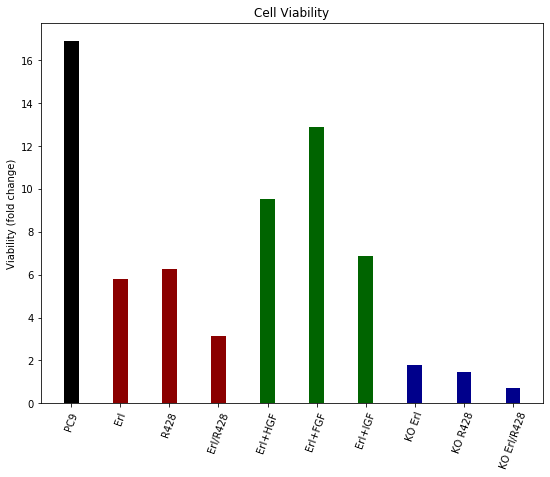

In [4]:
fig, axs = plt.subplots(1,1,figsize=(9,7))
plt.bar(np.linspace(1,10,10)-1, Y_cv,width=0.3,align='center', color=['black', 'darkred', 'darkred', 'darkred', 'darkgreen', 'darkgreen', 'darkgreen', 'darkblue', 'darkblue', 'darkblue'])
plt.xticks(np.arange(10), (treatments), rotation=70)
plt.title("Cell Viability")
plt.ylabel("Viability (fold change)")
plt.savefig("CellViability.png")
plt.show()

In [5]:
# kmeans_ = KMeans(n_clusters=5).fit(Xf_data.T)
# labels = kmeans_.labels_
# display(labels.shape)
# display(Xf_data.shape)

In [6]:
# kmeans_ = KMeans(n_clusters=5).fit((Xf_data))
# centers, DictClusterToMembers = ClusterAverages(np.array(Xf_data), labels, 5, Xf_data.shape[0], Xf_protnames, Xf_seqs)
# display(centers.shape)

In [7]:
# CVresults_max, CVresults_min, best_params = ComHyperPar(Xf_data, Y_cv, Xf_protnames, Xf_seqs)
# display(CVresults_min)

In [21]:
maxComp = 10
Q2Y = Q2Y_across_components(Xf_data, Y_cv, maxComp+1)
R2Y = R2Y_across_components(Xf_data, Y_cv, maxComp+1)

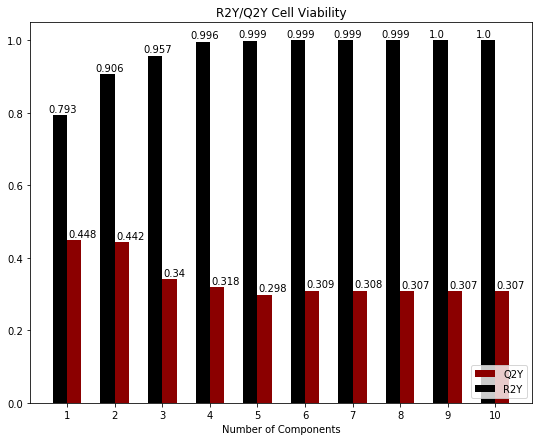

In [9]:
def truncate(f, n):
    return math.floor(f * 10 ** n) / 10 ** n

def disp_values(x,spac1,spac2,dec):
    for l, m in enumerate(x):
        plt.text(l+spac1,m+spac2,str(truncate(m,dec)))    #change to axs[ax].

range_ = np.linspace(1,maxComp,maxComp)

fig, axs = plt.subplots(1,1,figsize=(9,7))
plt.setp(axs, xticks=range_)
plt.bar(range_+0.15,Q2Y,width=0.3,align='center',label='Q2Y', color = "darkred")
plt.bar(range_-0.15,R2Y,width=0.3,align='center',label='R2Y', color = "black")
plt.title("R2Y/Q2Y Cell Viability")
plt.xlabel("Number of Components")
plt.legend(loc=4)
disp_values(Q2Y,1.03,0.01,3)
disp_values(R2Y,0.6,0.01,3)

In [10]:
kmeans = MyOwnKMEANS(5, Xf_protnames, Xf_seqs).fit(Xf_data, Y=None)
centers = kmeans.transform(Xf_data)
clustermembers = kmeans.ClusterMembers(Xf_data)

In [11]:
maxComp = centers.shape[1]
Q2Y = Q2Y_across_components(centers, Y_cv, maxComp)
R2Y = R2Y_across_components(centers, Y_cv, maxComp)

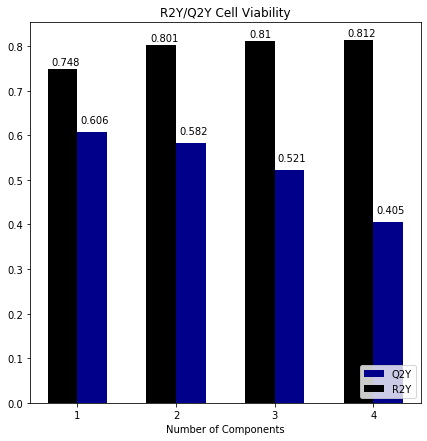

In [12]:
def truncate(f, n):
    return math.floor(f * 10 ** n) / 10 ** n

def disp_values(x,spac1,spac2,dec):
    for l, m in enumerate(x):
        plt.text(l+spac1,m+spac2,str(truncate(m,dec)))    #change to axs[ax].

range_ = np.linspace(1,maxComp-1,maxComp-1)

fig, axs = plt.subplots(1,1,figsize=(7,7))
plt.setp(axs, xticks=range_)
plt.bar(range_+0.15,Q2Y,width=0.3,align='center',label='Q2Y', color = "darkblue")
plt.bar(range_-0.15,R2Y,width=0.3,align='center',label='R2Y', color = "black")
plt.title("R2Y/Q2Y Cell Viability")
plt.xlabel("Number of Components")
plt.legend(loc=4)
disp_values(Q2Y,1.03,0.02,3)
disp_values(R2Y,0.74,0.01,3)
plt.savefig("R2YQ2Y_BR1_5Cl.png")

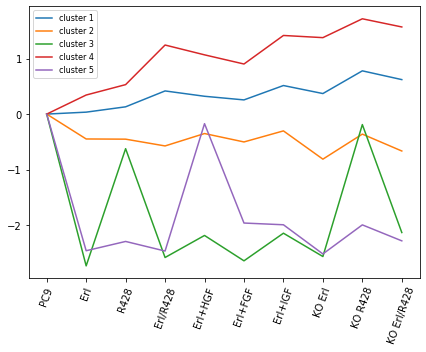

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.035012,0.131122,0.417808,0.321507,0.255986,0.515259,0.370602,0.780211,0.622208
1,0.0,-0.448968,-0.452407,-0.574718,-0.351000,-0.502698,-0.303212,-0.813186,-0.361195,-0.666049
2,0.0,-2.738939,-0.624176,-2.587750,-2.190047,-2.647679,-2.149349,-2.570024,-0.189310,-2.137233
3,0.0,0.343926,0.531669,1.246288,1.069085,0.903646,1.418646,1.379503,1.719634,1.572147
4,0.0,-2.465573,-2.298030,-2.471192,-0.172998,-1.965894,-1.997144,-2.523602,-1.998987,-2.287287


In [13]:
fig = plt.figure(figsize=(7,5))

centersT = np.transpose(centers)
for i in range(centersT.shape[0]):
    plt.plot(centersT[i,:], label = "cluster "+str(i+1))
    
plt.xticks(np.arange(centersT.shape[1]), (treatments), rotation=70)
plt.legend(loc=2, prop={'size':8})
plt.savefig("ClAvgAcrossCond_BR1.png")
plt.show()
display(pd.DataFrame(centersT))

In [14]:
ncl, ncomp = 5, 2
estimators = [('kmeans', MyOwnKMEANS(ncl, Xf_protnames, Xf_seqs)), ('plsr', PLSRegression(ncomp))]
pipe = Pipeline(estimators)

In [15]:
X_scores, Y_scores = pipe.fit_transform(Xf_data, Y_cv)
PC1_scores, PC2_scores = X_scores[:, 0], X_scores[:, 1]
PC1_xload, PC2_xload = pipe.named_steps.plsr.x_loadings_[:, 0], pipe.named_steps.plsr.x_loadings_[:, 1]
PC1_yload, PC2_yload = pipe.named_steps.plsr.y_loadings_[:, 0], pipe.named_steps.plsr.y_loadings_[:, 1]

Pearson's R:  0.7224708853155482 
 p-value:  0.018270637854363433


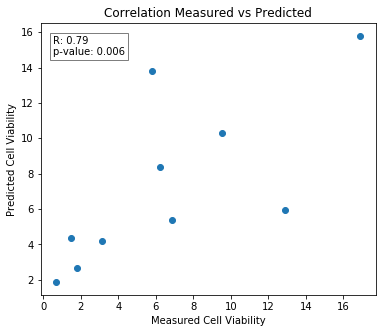

In [16]:
fig, axs = plt.subplots(1,1,figsize=(6,5))
MeasuredVsPredicted_LOOCVplot(Xf_data,Y_cv, pipe, fig, "none", axs)
plt.title("Correlation Measured vs Predicted")
plt.xlabel("Measured Cell Viability")
plt.ylabel("Predicted Cell Viability")
textstr = '\n'.join(['R: 0.79', 'p-value: 0.006'])
props = dict(boxstyle = 'square', facecolor = "white", alpha = 0.5)
plt.text(0.5, 14.7, textstr, bbox=props)
plt.savefig('Measured_Predict_5cl2co_pipe.pdf')
plt.show()

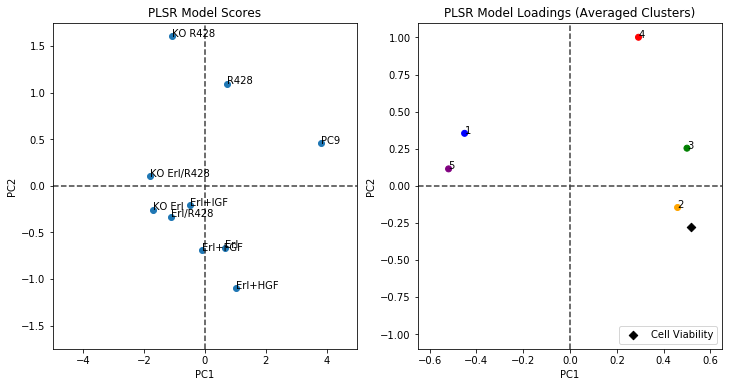

In [17]:
fig, axs = plt.subplots(1, 2,figsize=(12,6))
# colors_ = cm.rainbow(np.linspace(0, 1, 5))
colors_ = ["blue", "orange", "green", "red", "purple"]


axs[0].scatter(PC1_scores,PC2_scores)
for j, txt in enumerate(treatments):
    axs[0].annotate(txt, (PC1_scores[j], PC2_scores[j]))
axs[0].set_title('PLSR Model Scores')
axs[0].set_xlabel('PC1')
axs[0].set_ylabel('PC2')
axs[0].axhline(y=0, color='0.25', linestyle='--')
axs[0].axvline(x=0, color='0.25', linestyle='--')
axs[0].set_xlim([-5, 5])
axs[0].set_ylim([-1.75, 1.75])

for i, txt in enumerate(["1", "2", "3", "4", "5"]):
    axs[1].annotate(txt, (PC1_xload[i], PC2_xload[i]))
axs[1].scatter(PC1_xload, PC2_xload, c=np.arange(ncl), cmap=colors.ListedColormap(colors_))
axs[1].scatter(PC1_yload, PC2_yload, color='#000000', marker='D', label='Cell Viability')
axs[1].legend(loc=4)
axs[1].set_title('PLSR Model Loadings (Averaged Clusters)')
axs[1].set_xlabel('PC1')
axs[1].set_ylabel('PC2')
axs[1].axhline(y=0, color='0.25', linestyle='--')
axs[1].axvline(x=0, color='0.25', linestyle='--')
axs[1].set_xlim([-0.65, 0.65])
axs[1].set_ylim([-1.1, 1.1])
plt.savefig('scores_loadings.pdf')
plt.show()

In [18]:
ClusterMembers = pipe.named_steps.kmeans.ClusterMembers(Xf_data)
count = sum(len(v) for v in ClusterMembers.values())
CM_df = pd.DataFrame(dict([ (k, pd.Series(v)) for k,v in ClusterMembers.items() ]))
create_download_link(CM_df, 'fsdf')